## DD2421 Machine Learning - Lab 1: Decision Trees  
Haocheng Zhang & Mariah Sabioni

### Assignment 0
Each one of the datasets has properties which makes
them hard to learn. Motivate which of the three problems is most
difficult for a decision tree algorithm to learn.

The most difficult problem would be problem 2, because on this problem there is no "best question" to start the tree and you cannot terminate the tree and "throw away" any of the features to define the class label, therefore the tree has an exponential number of nodes.  
The algorithm has to ask 6 questions, one for each feature, because knowing one answer does not change the probability of the next (there are no redundant features).  
It is also interesting to notice that it is the only of the problems that was not expressed in logic form. It would tke quite a number of lines to do that.

### Assignment 1
The file dtree.py defines a function entropy which
calculates the entropy of a dataset. Import this file along with the
monks datasets and use it to calculate the entropy of the training
datasets.

In [1]:
from dtree import entropy, averageGain, select, bestAttribute, buildTree, check, mostCommon, allPruned
from drawtree_qt5 import drawTree
import monkdata as m
import random
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import pandas as pd

In [2]:
dataset_names = ['MONK-1', 'MONK-2', 'MONK-3']

In [3]:
ent1 = entropy(m.monk1)
ent2 = entropy(m.monk2)
ent3 = entropy(m.monk3)
ents = [ent1, ent2, ent3]

In [4]:
print(tabulate({"Dataset": dataset_names,"Entropy": ents}, headers="keys", tablefmt="github"))

| Dataset   |   Entropy |
|-----------|-----------|
| MONK-1    |  1        |
| MONK-2    |  0.957117 |
| MONK-3    |  0.999806 |


### Assignment 2
Explain entropy for a uniform distribution and a
non-uniform distribution, present some example distributions with
high and low entropy.

Entropy in simple terms is a measurement of chaos. Therefore the higher the unpredictability, the higher the entropy.
* Uniform distributions:  
Dice (or the honest ones) have uniform distributions. However, if you compare a 6-side die and a 20-side die, the entropy is bigger for the 20-side die. That is because it is harder to know the outcome for the 20-side than it is for the 6-side (if you guess, you have less chance to be right on the 20-side).
* Non-uniform distributions:  
A fake coin is an example of a non-uniform distribution. In that case, the "faker" (i.e., the larger the probability of one of the sides), the lower the entropy. That makes sense, since it becomes easier to know the outcome, therefore the uncertainty is lower.
* Uniform vs. non-uniform distributions:  
If we compare the honest and the fake coin (uniform and non-uniform, respectively), the entropy will be lower for the fake coin. That is because the bias reduces the uncertainty. In fact, the uniform distribution contains the higher uncertainty (= higher entropy). 

### Assignment 3
Use the function averageGain (defined in dtree.py)
to calculate the expected information gain corresponding to each of
the six attributes. Note that the attributes are represented as instances of the class Attribute (defined in monkdata.py) which you can access via m.attributes[0], ..., m.attributes[5]. Based on
the results, which attribute should be used for splitting the examples
at the root node?

In [5]:
datasets = [m.monk1, m.monk2, m.monk3]
gains = []
for i, dataset in enumerate(datasets):
    gain = {}
    gain['dataset'] = dataset_names[i]
    for attribute in m.attributes:
        gain[attribute] = averageGain(dataset, attribute)
    gains.append(gain)
print(tabulate(gains, headers="keys", tablefmt="github"))

| dataset   |         A1 |         A2 |          A3 |         A4 |        A5 |          A6 |
|-----------|------------|------------|-------------|------------|-----------|-------------|
| MONK-1    | 0.0752726  | 0.00583843 | 0.00470757  | 0.0263117  | 0.287031  | 0.000757856 |
| MONK-2    | 0.00375618 | 0.0024585  | 0.00105615  | 0.0156642  | 0.0172772 | 0.00624762  |
| MONK-3    | 0.00712087 | 0.293736   | 0.000831114 | 0.00289182 | 0.255912  | 0.00707703  |


In [6]:
print('The root node should provide the largest information gain calculated above:')
for i, _ in enumerate(gains):
    gain_values = []
    gain_attributes = []
    for attribute in m.attributes:
        gain_values.append(gains[i][attribute])
        gain_attributes.append(attribute)
    print(f'{dataset_names[i]}: root node {gain_attributes[gain_values.index(max(gain_values))]} | '
          + f'information gain = {max(gain_values)}')

The root node should provide the largest information gain calculated above:
MONK-1: root node A5 | information gain = 0.28703074971578435
MONK-2: root node A5 | information gain = 0.01727717693791797
MONK-3: root node A2 | information gain = 0.29373617350838865


In [7]:
best_attribute = []
print('Or, using the defined bestAttribute function:')
for i, dataset in enumerate(datasets):
    best_attribute = bestAttribute(dataset, m.attributes)
    print(f'{dataset_names[i]}: root node {best_attribute}')

Or, using the defined bestAttribute function:
MONK-1: root node A5
MONK-2: root node A5
MONK-3: root node A2


### Assignment 4
For splitting we choose the attribute that maximizes
the information gain, Eq.3. Looking at Eq.3 how does the entropy of
the subsets, Sk, look like when the information gain is maximized?
How can we motivate using the information gain as a heuristic for
picking an attribute for splitting? Think about reduction in entropy
after the split and what the entropy implies.

In [8]:
for i, dataset in enumerate(datasets):
    best_attribute = bestAttribute(dataset, m.attributes)
    print(f'{dataset_names[i]}')
    print(f'> attribute: {best_attribute}')
    print(f'> entropy before split: S = {ents[i]}')
    print(f'> entropy after split:') 
    for k, v in enumerate(best_attribute.values):
        subset = select(dataset, attribute, v)
        subset_entropy = entropy(subset)
        print(f'>> S{k}({best_attribute}={v}) = {subset_entropy}')
    print(f'> information gain after split: {averageGain(dataset, best_attribute)}') 

MONK-1
> attribute: A5
> entropy before split: S = 1.0
> entropy after split:
>> S0(A5=1) = 0.9990797181805819
>> S1(A5=2) = 0.9993759069576514
>> S2(A5=3) = 0.0
>> S3(A5=4) = 0.0
> information gain after split: 0.28703074971578435
MONK-2
> attribute: A5
> entropy before split: S = 0.957117428264771
> entropy after split:
>> S0(A5=1) = 0.9182958340544896
>> S1(A5=2) = 0.9830605548016025
>> S2(A5=3) = 0.0
>> S3(A5=4) = 0.0
> information gain after split: 0.01727717693791797
MONK-3
> attribute: A2
> entropy before split: S = 0.9998061328047111
> entropy after split:
>> S0(A2=1) = 0.9898220559635811
>> S1(A2=2) = 0.9954515828457715
>> S2(A2=3) = 0.0
> information gain after split: 0.29373617350838865


In [9]:
for i, dataset in enumerate(datasets):
    print('__________________________________________________________________')
    print(f'{dataset_names[i]}')
    best_attribute = bestAttribute(dataset, m.attributes)
    print(f'> entropy before split: S = {ents[i]}')
    print('------------------------------------------------------------------')
    for attribute in m.attributes:
        if(attribute == best_attribute):
            print(f'> BEST ATTRIBUTE: {attribute}')
        else:
            print(f'> attribute: {attribute}')
        print(f'> entropy after split:') 
        for k, v in enumerate(attribute.values):
            subset = select(dataset, attribute, v)
            subset_entropy = entropy(subset)
            print(f'>> S{k}({best_attribute}={v}) = {subset_entropy}')
        print(f'> information gain after split: {averageGain(dataset, attribute)}') 
        print('------------------------------------------------------------------')

__________________________________________________________________
MONK-1
> entropy before split: S = 1.0
------------------------------------------------------------------
> attribute: A1
> entropy after split:
>> S0(A5=1) = 0.8944518845341284
>> S1(A5=2) = 0.9983636725938131
>> S2(A5=3) = 0.8779620013943912
> information gain after split: 0.07527255560831925
------------------------------------------------------------------
> attribute: A2
> entropy after split:
>> S0(A5=1) = 0.9852281360342516
>> S1(A5=2) = 0.9983636725938131
>> S2(A5=3) = 0.9970590569034107
> information gain after split: 0.005838429962909286
------------------------------------------------------------------
> attribute: A3
> entropy after split:
>> S0(A5=1) = 0.9957274520849256
>> S1(A5=2) = 0.9948131754904235
> information gain after split: 0.00470756661729721
------------------------------------------------------------------
> attribute: A4
> entropy after split:
>> S0(A5=1) = 0.9587118829771318
>> S1(A5=2) = 0.

The information gain is maximized when the entropy of the subsets Sk relative to the entropy of the original dataset S is reduced by the largest amount.  
Entropy is a measurement of uncertainty. Therefore, the attibute with larger information gain represents the attribute that, when known, provides subsets with less uncertainty (=less entropy).
It means that when we use that variable to split the dataset, we know more about the subsets (less random = easier to predict). This allows the construction of a simpler model with better predictive power.

In [10]:
dataset = datasets[0]
best_attribute = bestAttribute(dataset, m.attributes)
remaining_attributes = [a for a in m.attributes if a != best_attribute]
subsets = []
subset_names = []
gains_sub = []
for k, v in enumerate(best_attribute.values):
    subset = select(dataset, best_attribute, v)
    subsets.append(subset)
    subset_names.append(dataset_names[0] + "_subset-" + str(k))
print(f'{dataset_names[0]}')
for i, subset in enumerate(subsets):
    gain_sub = {}
    gain_sub['subset'] = subset_names[i]
    for attribute in remaining_attributes:
        gain_sub[attribute] = averageGain(subset, attribute)
    gains_sub.append(gain_sub)
print(tabulate(gains_sub, headers="keys", tablefmt="github"))

MONK-1
| subset          |        A1 |         A2 |        A3 |        A4 |         A6 |
|-----------------|-----------|------------|-----------|-----------|------------|
| MONK-1_subset-0 | 0         | 0          | 0         | 0         | 0          |
| MONK-1_subset-1 | 0.0402168 | 0.0150635  | 0.0372726 | 0.0488922 | 0.0258073  |
| MONK-1_subset-2 | 0.0330551 | 0.00219718 | 0.0179823 | 0.0191228 | 0.0451085  |
| MONK-1_subset-3 | 0.206291  | 0.0338984  | 0.0259061 | 0.0759329 | 0.00332396 |


In [11]:
print('Custom built tree (using bestAttribute and mostCommon functions:')
print('__________________________________________________________________')
print(f'{dataset_names[0]}')
print(f'> Node 1: {best_attribute}')
print(f'> information gain after split: {averageGain(dataset, best_attribute)}') 
print(f'> majority class: {mostCommon(dataset)}') 
for i, subset in enumerate(subsets):
    best_attribute = bestAttribute(subset, remaining_attributes)
    print('------------------------------------------------------------------')
    print(f'> {subset_names[i]}')
    print(f'>> Node 2: {best_attribute}')
    print(f'>> information gain after split: {averageGain(subset, best_attribute)}')
    print(f'>> majority class: {mostCommon(subset)}') 
    sub_subsets = []
    sub_subset_names = []
    for k, v in enumerate(best_attribute.values):
        sub_subset = select(subset, best_attribute, v)
        sub_subsets.append(sub_subset)
        sub_subset_names.append(subset_names[i] + "_subset-" + str(k))
    for j, sub_subset in enumerate(sub_subsets):
        print('..................................................................')
        print(f'>> {sub_subset_names[j]}')
        print(f'>>> majority class: {mostCommon(sub_subset)}') 

Custom built tree (using bestAttribute and mostCommon functions:
__________________________________________________________________
MONK-1
> Node 1: A5
> information gain after split: 0.28703074971578435
> majority class: False
------------------------------------------------------------------
> MONK-1_subset-0
>> Node 2: A1
>> information gain after split: 0.0
>> majority class: True
..................................................................
>> MONK-1_subset-0_subset-0
>>> majority class: True
..................................................................
>> MONK-1_subset-0_subset-1
>>> majority class: True
..................................................................
>> MONK-1_subset-0_subset-2
>>> majority class: True
------------------------------------------------------------------
> MONK-1_subset-1
>> Node 2: A4
>> information gain after split: 0.04889220262952931
>> majority class: False
..................................................................
>> MONK-

In [12]:
tree = buildTree(dataset, m.attributes, maxdepth=2)
print('predefined routine tree:')
print(tree)
#print(drawTree(tree)) #this kills the kernel

predefined routine tree:
A5(+A4(---)A6(--)A1(--+))


### Assignment 5
Build the full decision trees for all three Monk
datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and
test datasets.
Compute the train and test set errors for the three Monk datasets
for the full trees. Were your assumptions about the datasets correct?
Explain the results you get for the training and test datasets.

In [13]:
test_datasets = [m.monk1test, m.monk2test, m.monk3test]
performances = []
for i, dataset in enumerate(datasets):
    t = buildTree(dataset, m.attributes);
    print(f'{dataset_names[i]}:')
    print(t)
    performance = {}
    performance['dataset'] = dataset_names[i]
    performance['Performance_train'] = check(t, dataset)
    performance['Error_train'] = 1 - performance['Performance_train']
    performance['Performance_test'] = check(t, test_datasets[i])
    performance['Error_test'] = 1 - performance['Performance_test']
    performances.append(performance)

MONK-1:
A5(+A4(A1(A2(+--)A2(-++)A2(--+))A2(-+-)A3(A1(A2(+--)+A2(-++))A2(--A1(--+))))A6(A4(A3(A1(A2(+--)A2(-+-)-)-)A1(A2(+--)--)-)A3(A4(A1(+--)A1(-++)+)A1(-A2(-+-)A2(--+))))A1(A2(+--)A2(-+-)A2(+-+)))
MONK-2:
A5(A3(A6(-A1(-A2(--A4(--+))A2(-A4(-+-)-)))A4(A2(--A1(-+-))+A1(A2(-A6(-+)-)A2(A6(-+)++)+)))A3(A4(A2(-+-)A6(A1(--+)+)A1(A2(-++)++))A2(A4(++A1(+-A6(+-)))-A1(+A4(+--)-)))A3(A6(A1(-A4(-++)A4(--+))A2(+A1(+-A4(+--))A4(A1(-++)A1(+--)-)))A4(A2(A6(-+)A6(+-)A1(A6(-+)++))A1(A2(-+-)--)A1(A6(+-)--)))A2(A6(-A1(+-A4(++-)))A1(A4(-A3(-+)A3(A6(-+)A6(+-)))A3(+A6(+-))-)A3(A4(--+)-)))
MONK-3:
A2(A5(++A4(A1(--+)++)-)A5(+A1(+A4(+-+)+)A3(A4(+A1(--+)A1(+--))+)-)A4(A5(--+A1(--+))--))


In [14]:
print(tabulate(performances, headers="keys", tablefmt="github"))

| dataset   |   Performance_train |   Error_train |   Performance_test |   Error_test |
|-----------|---------------------|---------------|--------------------|--------------|
| MONK-1    |                   1 |             0 |           0.828704 |    0.171296  |
| MONK-2    |                   1 |             0 |           0.69213  |    0.30787   |
| MONK-3    |                   1 |             0 |           0.944444 |    0.0555556 |


The assumption that dataset MONK-2 would be the most difficult one seems correct since it has both the most complet model (tree with more nodes) and the biggest error on the test dataset (even though the 3rd dataset is the one that contains noise!).

All the errors are zero for the train dataset, which indicates that the model successfully learned from the train dataset. However, the error is not zero on the test sets, which means that the model does not generalize well, and is probably overfitting the training data. Besides, MONK-3 contains noise (misclassified samples) which will increase the error.

In [15]:
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

In [16]:
monk1train, monk1val = partition(m.monk1, 0.6)

In [17]:
def prunAndCheck(tree, val_dataset, train_dataset, print_console = True):
    num_pruns = 0
    acc = 0
    while True:
        print(f'Prunning iteration {num_pruns}...') if (print_console) else None
        prunned_trees = allPruned(tree)
        prunned_accs = [check(t, val_dataset) for t in prunned_trees]
        max_prunned_acc = max(prunned_accs)
        if (max_prunned_acc < acc):
            print(f'No tree better than pervious iteration') if (print_console) else None
            break
        print(f'Tree update! new: {max_prunned_acc} | previous: {acc}') if (print_console) else None
        tree = prunned_trees[prunned_accs.index(max_prunned_acc)]
        acc = max_prunned_acc
        acc_train = check(tree, train_dataset)
        num_pruns += 1
    return tree, acc, acc_train, num_pruns

In [18]:
original_tree = buildTree(monk1train, m.attributes)
original_acc_val = check(original_tree, monk1val)
original_acc_train = check(original_tree, monk1train)
tree = original_tree

tree, acc_val, acc_train, num_pruns = prunAndCheck(tree, monk1val, monk1train)

Prunning iteration 0...
Tree update! new: 0.8 | previous: 0
Prunning iteration 1...
Tree update! new: 0.84 | previous: 0.8
Prunning iteration 2...
No tree better than pervious iteration


In [19]:
print(f'> original tree: {original_tree}')
print(f'performance on train set: {original_acc_train}')
print(f'performance on validation set: {original_acc_val}')
print(f'performance on test set: {check(original_tree, m.monk1test)}')
print(f'> best tree: {tree}')
print(f'performance on train set: {acc_train}')
print(f'performance on validation set: {acc_val}')
print(f'performance on test set: {check(tree, m.monk1test)}')
print(f'> number of pruns = {num_pruns}')

> original tree: A5(+A4(A2(A1(+--)A1(-++)-)-A1(A2(+--)-+))A6(A4(A2(-A1(-+-)-)A1(A2(+--)--)-)A3(A1(A2(+-+)++)A4(+--)))A1(-A2(-+-)A2(+-+)))
performance on train set: 1.0
performance on validation set: 0.76
performance on test set: 0.7754629629629629
> best tree: A5(+A4(A2(A1(+--)A1(-++)-)--)-A1(-A2(-+-)A2(+-+)))
performance on train set: 0.8513513513513513
performance on validation set: 0.84
performance on test set: 0.7870370370370371
> number of pruns = 2


Observations:
- Re-running the code from cell 15 onwards shows that the "optimal" result of prunning is subject to high variation depending on the split of train and validation sets.
- The result has a lower performance on the train set, but a higher performance on the validation set, which is the intended outcome of prunning, since the validation is the strategy to prevent overfitting.
- However, the prunned tree has a worse performance on the test set then the original tree, which shows that in this case pruning was not the best strategy.

### Assignment 6
Explain pruning from a bias variance trade-off perspective.

Ideally a model seeks low variance and low bias, but unfortunately there is a trade-off between the two (increasing bias reduces variance and vice versa).  
The variance is determined by the depth of the tree. Deeper desision trees are more complex, have higher variance and higher chance of overfitting.  
Prunning is a technique that allows the reduction of the model's complexity minimizing lost of predictive power. It is a effective approach to prevent overfitting. However, the bias is increased, which can lead to decreased performance in more complex problems.

### Assignment 7
Evaluate the effect pruning has on the test error for
the monk1 and monk3 datasets, in particular determine the optimal
partition into training and pruning by optimizing the parameter
fraction. Plot the classification error on the test sets as a function
of the parameter fraction ∈ {0.3, 0.4, 0.5, 0.6, 0.7, 0.8}.

Note that the split of the data is random. We therefore need to
compute the statistics over several runs of the split to be able to draw
any conclusions. Reasonable statistics includes mean and a measure
of the spread. Do remember to print axes labels, legends and data
points as you will not pass without them.

In [20]:
def optimizeTree(dataset, test_dataset, iterations):
    test_es = []
    val_es = []
    fractions = [0.3,0.4,0.5,0.6,0.7,0.8]
    for fraction in fractions:
        e_test_fraction = []
        e_val_fraction = []
        for times in range(iterations):
            monktrain, monkval = partition(dataset, fraction)
            tree = buildTree(monktrain, m.attributes)
            best_tree, acc_val, _, _ = prunAndCheck(tree, monkval, monktrain, print_console = False)
            e_test = 1 - check(best_tree, test_dataset)
            e_test_fraction.append(e_test)
            e_val_fraction.append(1 - acc_val)
        test_es.append(np.array(e_test_fraction))
        val_es.append(e_val_fraction)
    return test_es, val_es

In [21]:
test_es_1, val_es_1 = optimizeTree(m.monk1,m.monk1test, 100)

In [22]:
fractions = [0.3,0.4,0.5,0.6,0.7,0.8]
errors_1 = []
for i, fraction in enumerate(fractions):
    error_1 = {}
    error_1['fraction'] = fraction
    error_1['Error_val'] = np.mean(np.array(val_es_1)[i])
    error_1['Error_test'] = np.mean(np.array(test_es_1)[i])
    errors_1.append(error_1)

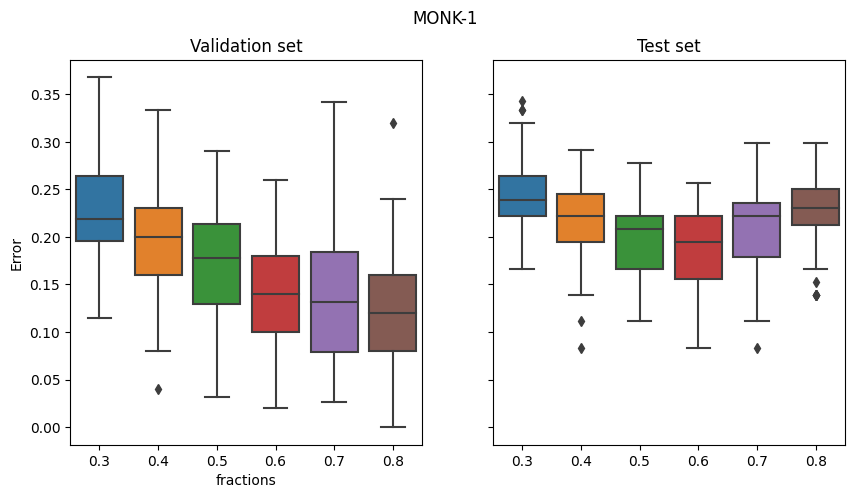

|   fraction |   Error_val |   Error_test |
|------------|-------------|--------------|
|        0.3 |    0.231264 |     0.237546 |
|        0.4 |    0.194667 |     0.211875 |
|        0.5 |    0.174516 |     0.202639 |
|        0.6 |    0.1332   |     0.185764 |
|        0.7 |    0.136579 |     0.205509 |
|        0.8 |    0.1196   |     0.226875 |


In [23]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle('MONK-1')

ax = sns.boxplot(ax=axes[0], data=val_es_1)
axes[0].set_title('Validation set')
axes[0].set_xticklabels(fractions)
axes[0].set(xlabel="fractions",ylabel="Error")

sns.boxplot(ax=axes[1], data=test_es_1)
axes[1].set_title('Test set')
axes[1].set_xticklabels(fractions)
plt.show()

print(tabulate(errors_1, headers="keys", tablefmt="github"))

In [24]:
test_es_3, val_es_3 = optimizeTree(m.monk3,m.monk3test, 100)

In [25]:
fractions = [0.3,0.4,0.5,0.6,0.7,0.8]
errors_3 = []
for i, fraction in enumerate(fractions):
    error_3 = {}
    error_3['fraction'] = fraction
    error_3['Error_val'] = np.mean(np.array(val_es_3)[i])
    error_3['Error_test'] = np.mean(np.array(test_es_3)[i])
    errors_3.append(error_3)

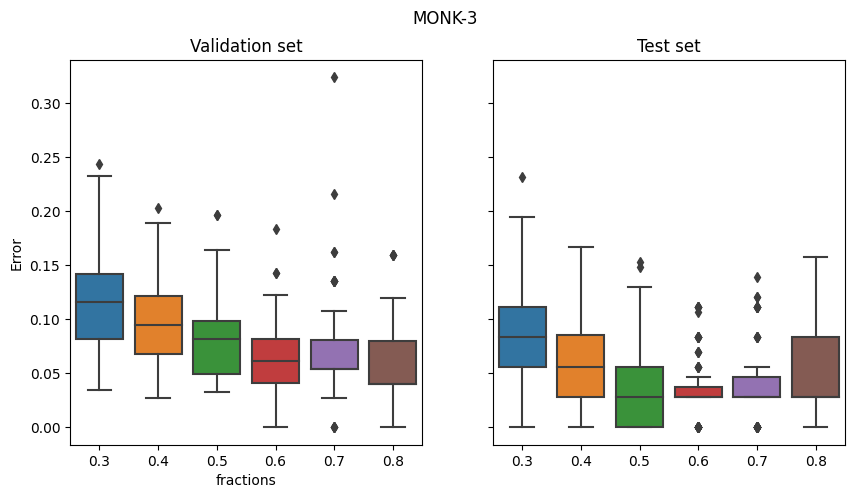

|   fraction |   Error_val |   Error_test |
|------------|-------------|--------------|
|        0.3 |   0.121512  |    0.0875926 |
|        0.4 |   0.0985135 |    0.0600926 |
|        0.5 |   0.0809836 |    0.0402778 |
|        0.6 |   0.0689796 |    0.0349074 |
|        0.7 |   0.0705405 |    0.0365278 |
|        0.8 |   0.0612    |    0.0497222 |


In [26]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle('MONK-3')

ax = sns.boxplot(ax=axes[0], data=val_es_3)
axes[0].set_title('Validation set')
axes[0].set_xticklabels(fractions)
axes[0].set(xlabel="fractions",ylabel="Error")

sns.boxplot(ax=axes[1], data=test_es_3)
axes[1].set_title('Test set')
axes[1].set_xticklabels(fractions)
plt.show()

print(tabulate(errors_3, headers="keys", tablefmt="github"))